# Cancer Death Rate

Link to the datathon: [https://dphi.tech/practice/challenge/52#problem](https://dphi.tech/practice/challenge/52#problem)

## Importing Libraries

In [ ]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# to plot the diagrams within the cells
%matplotlib inline



---



## Reading and Loading the Data

In [ ]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [ ]:
cancer_data.shape

(3051, 34)

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000




---



## Splitting the Data

In [ ]:
X = cancer_data.drop('TARGET_deathRate',axis=1)     #Input variables
y = cancer_data['TARGET_deathRate']                 #Target variable

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

## Cleaning the data

In [ ]:
X_train.shape

(2440, 33)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 351 to 860
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2440 non-null   float64
 1   avgDeathsPerYear         2440 non-null   int64  
 2   incidenceRate            2440 non-null   float64
 3   medIncome                2440 non-null   int64  
 4   popEst2015               2440 non-null   int64  
 5   povertyPercent           2440 non-null   float64
 6   studyPerCap              2440 non-null   float64
 7   binnedInc                2440 non-null   object 
 8   MedianAge                2440 non-null   float64
 9   MedianAgeMale            2440 non-null   float64
 10  MedianAgeFemale          2440 non-null   float64
 11  Geography                2440 non-null   object 
 12  AvgHouseholdSize         2440 non-null   float64
 13  PercentMarried           2440 non-null   float64
 14  PctNoHS18_24           

In [ ]:
X_train['Geography'].value_counts()

West Baton Rouge Parish, Louisiana    2
Glacier County, Montana               2
Kenosha County, Wisconsin             2
San Francisco County, California      2
Fairfield County, Ohio                2
                                     ..
Mills County, Iowa                    1
Hillsdale County, Michigan            1
Bath County, Kentucky                 1
Washington County, Kansas             1
Marshall County, Illinois             1
Name: Geography, Length: 1947, dtype: int64

In [ ]:
X_train['binnedInc'].value_counts()

(51046.4, 54545.6]    259
(42724.4, 45201]      251
(37413.8, 40362.7]    250
(54545.6, 61494.5]    250
(48021.6, 51046.4]    246
(34218.1, 37413.8]    244
(40362.7, 42724.4]    243
(45201, 48021.6]      242
[22640, 34218.1]      231
(61494.5, 125635]     224
Name: binnedInc, dtype: int64

Dropping BinnedInc and Geography

In [ ]:
X_train = X_train.drop('binnedInc',axis=1)
X_train = X_train.drop('Geography',axis=1)

## Visualization

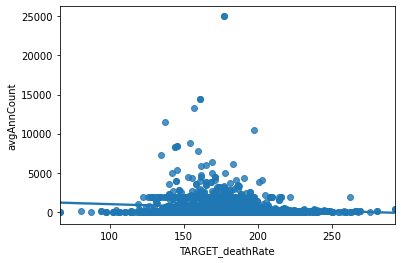

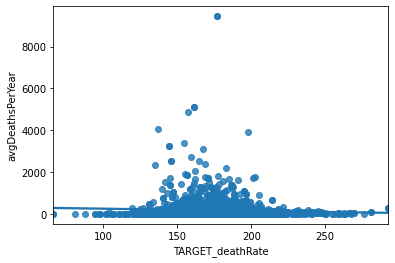

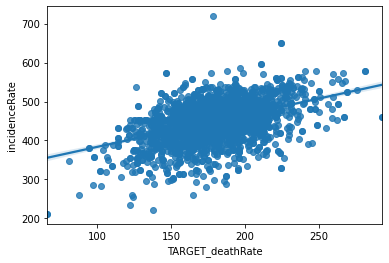

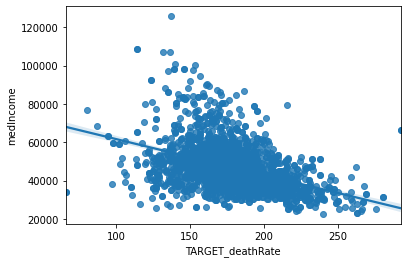

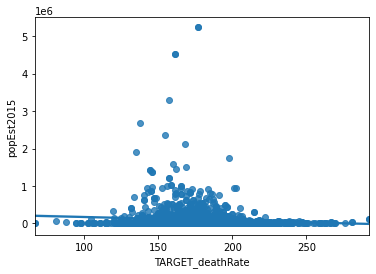

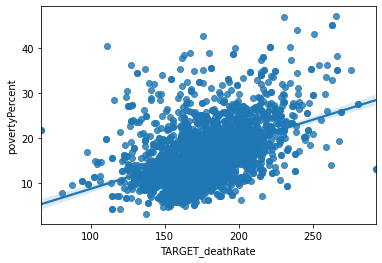

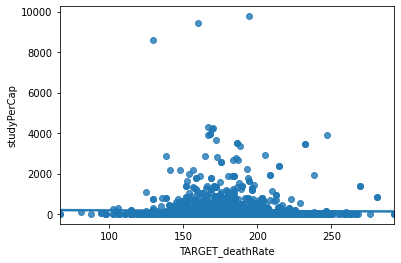

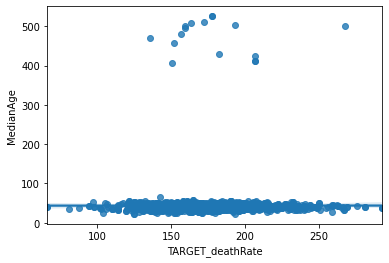

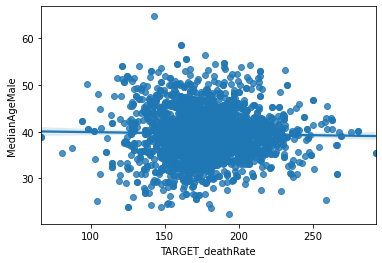

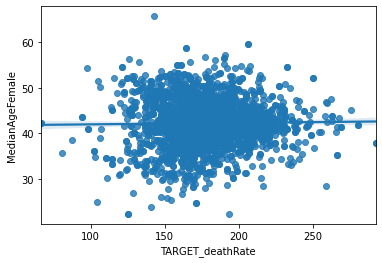

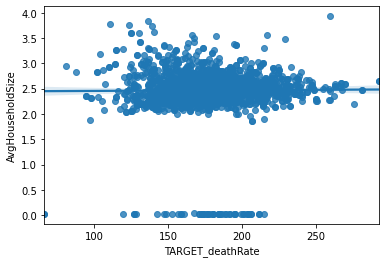

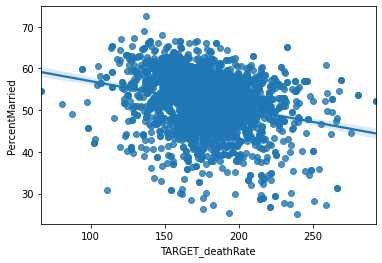

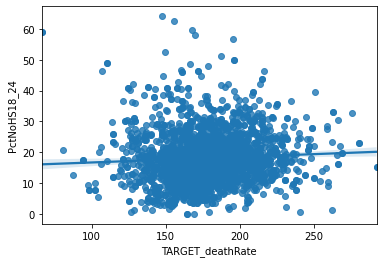

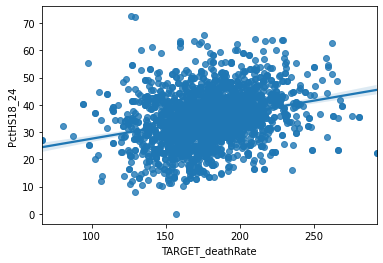

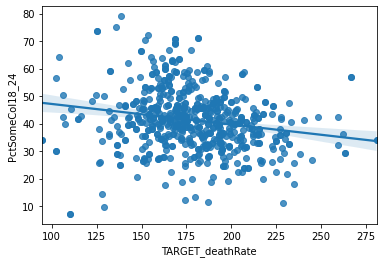

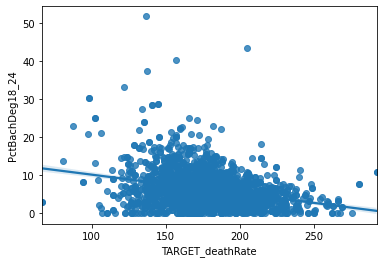

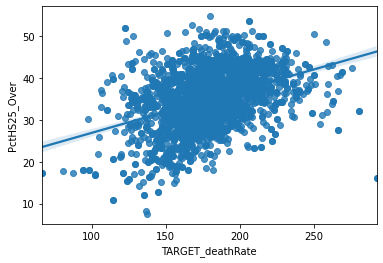

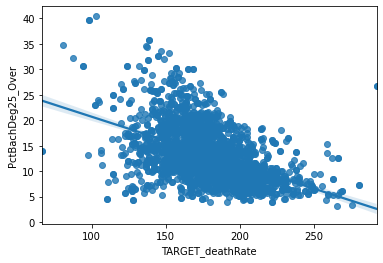

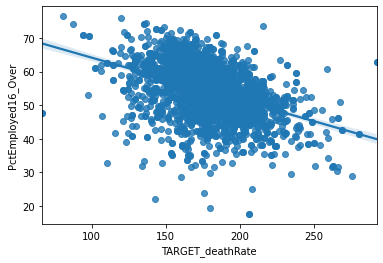

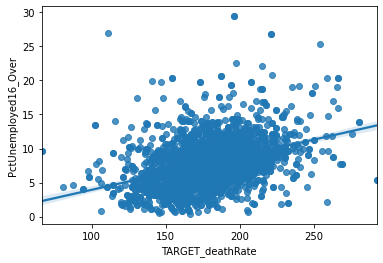

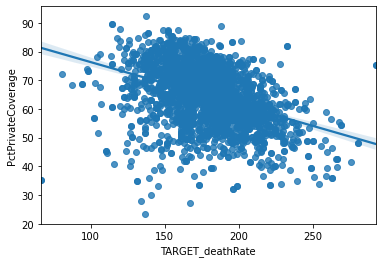

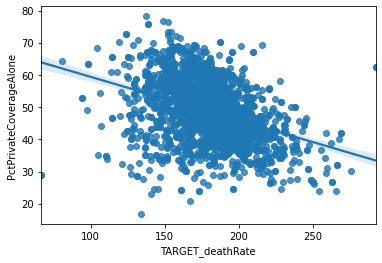

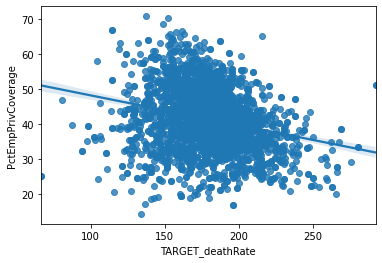

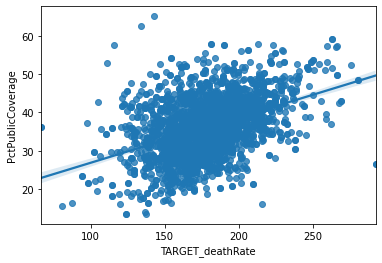

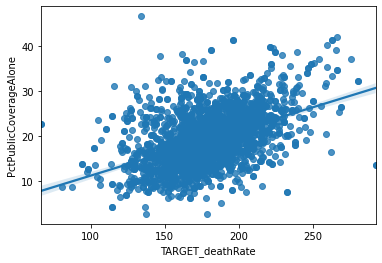

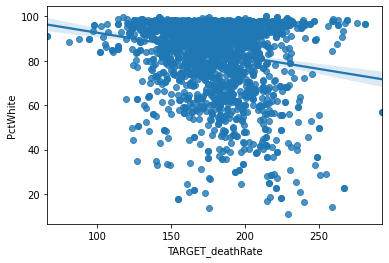

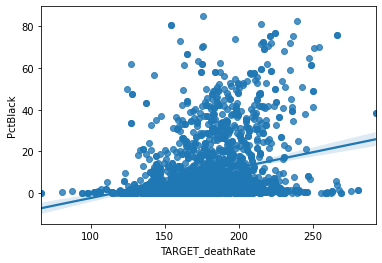

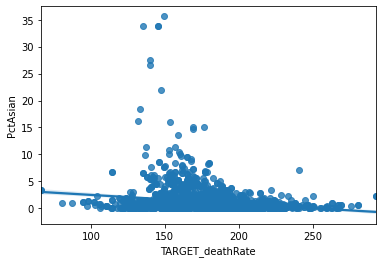

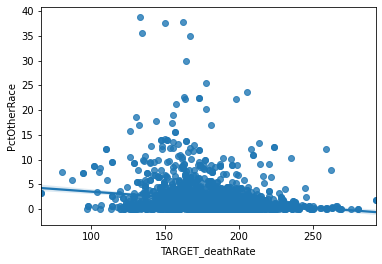

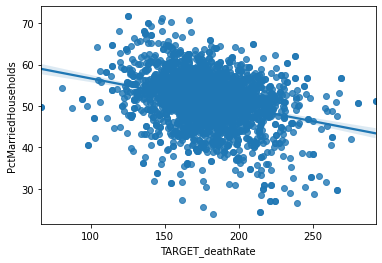

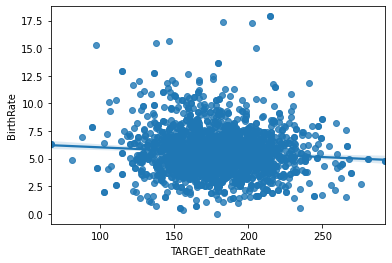

In [ ]:
numeric_data = X_train
for feature in numeric_data.columns:
  sns.regplot(x=y_train, y=feature, data=numeric_data)
  plt.show() 

In [ ]:
X_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1804
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          120
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     482
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

In [ ]:
X_train = X_train.drop('PctSomeCol18_24',axis=1)    #Dropping the column as the missing value is large
X_train.shape

(2440, 30)

In [ ]:
mean_PctEmployed16_Over  = X_train['PctEmployed16_Over'].mean()
mean_PctPrivateCoverageAlone = X_train['PctPrivateCoverageAlone'].mean()

In [ ]:
X_train['PctEmployed16_Over'] = X_train['PctEmployed16_Over'].fillna(value=mean_PctEmployed16_Over)
X_train['PctPrivateCoverageAlone'] = X_train['PctPrivateCoverageAlone'].fillna(value=mean_PctPrivateCoverageAlone)

In [ ]:
X_train.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
X_train.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2440.000000,2440.000000,2440.000000,2440.000000,2.440000e+03,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.00000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,572.399387,176.176639,448.771047,46949.352459,9.418692e+04,16.825369,159.358880,43.727705,39.580492,42.241844,2.46707,51.826025,18.129672,34.948156,6.168033,34.881393,13.295451,54.259871,7.819139,64.670000,48.723340,41.475697,36.200082,19.134344,84.067692,9.182983,1.181185,1.839571,51.258105,5.567807
std,1260.902458,451.987703,50.734354,11753.475612,2.775358e+05,6.353332,533.177220,35.415130,5.136279,5.226898,0.43249,6.824075,8.185587,9.121828,4.564280,6.988957,5.336586,8.043976,3.471864,10.435784,8.836397,9.270774,7.674219,5.994724,16.187338,14.807157,2.297872,3.237217,6.528605,1.926556
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.02210,25.100000,0.000000,0.000000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,13.500000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000
25%,80.000000,29.000000,422.200000,39022.000000,1.241250e+04,12.175000,0.000000,37.800000,36.400000,39.300000,2.37000,47.800000,12.775000,29.200000,3.100000,30.600000,9.400000,49.200000,5.500000,57.500000,43.300000,34.900000,30.900000,14.800000,78.291346,0.615855,0.265215,0.288668,47.617864,4.487234
50%,171.500000,62.000000,453.549422,45213.000000,2.671000e+04,15.800000,0.000000,40.900000,39.500000,42.300000,2.49000,52.500000,17.000000,34.600000,5.450000,35.400000,12.400000,54.259871,7.600000,65.300000,48.723340,41.500000,36.200000,18.700000,90.335614,2.270295,0.568864,0.784317,51.712230,5.354752
75%,522.250000,149.000000,480.575000,52388.750000,6.969550e+04,20.300000,92.475571,43.900000,42.400000,45.300000,2.62000,56.500000,22.300000,40.700000,8.100000,39.700000,16.300000,60.100000,9.600000,72.325000,54.000000,47.900000,41.400000,22.900000,95.589600,10.259338,1.223475,2.038654,55.444772,6.450384
max,24965.000000,9445.000000,718.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.93000,72.500000,64.100000,72.500000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.200000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,17.877095


## Cleaning Test Data Set

In [ ]:
X_test.shape

(611, 33)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 270 to 1370
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              611 non-null    float64
 1   avgDeathsPerYear         611 non-null    int64  
 2   incidenceRate            611 non-null    float64
 3   medIncome                611 non-null    int64  
 4   popEst2015               611 non-null    int64  
 5   povertyPercent           611 non-null    float64
 6   studyPerCap              611 non-null    float64
 7   binnedInc                611 non-null    object 
 8   MedianAge                611 non-null    float64
 9   MedianAgeMale            611 non-null    float64
 10  MedianAgeFemale          611 non-null    float64
 11  Geography                611 non-null    object 
 12  AvgHouseholdSize         611 non-null    float64
 13  PercentMarried           611 non-null    float64
 14  PctNoHS18_24           

In [ ]:
X_test['Geography'].value_counts()

Floyd County, Iowa                   2
Gwinnett County, Georgia             2
Hudspeth County, Texas               2
Washington County, North Carolina    2
Rockingham County, Virginia          2
                                    ..
Armstrong County, Pennsylvania       1
Essex County, Vermont                1
Teton County, Wyoming                1
Zapata County, Texas                 1
Worth County, Iowa                   1
Name: Geography, Length: 580, dtype: int64

In [ ]:
X_test['binnedInc'].value_counts()

[22640, 34218.1]      70
(37413.8, 40362.7]    68
(54545.6, 61494.5]    65
(34218.1, 37413.8]    65
(40362.7, 42724.4]    63
(51046.4, 54545.6]    59
(61494.5, 125635]     58
(45201, 48021.6]      57
(42724.4, 45201]      55
(48021.6, 51046.4]    51
Name: binnedInc, dtype: int64

In [ ]:
X_test = X_test.drop('binnedInc',axis=1)
X_test = X_test.drop('Geography',axis=1)

In [ ]:
X_test.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            462
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          32
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    122
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [ ]:
X_test = X_test.drop('PctSomeCol18_24',axis=1)    #Dropping the column as the missing value is large
X_test.shape

(611, 30)

In [ ]:
mean_PctEmployed16_Over_test  = X_test['PctEmployed16_Over'].mean()
mean_PctPrivateCoverageAlone_test = X_test['PctPrivateCoverageAlone'].mean()

In [ ]:
X_test['PctEmployed16_Over'] = X_test['PctEmployed16_Over'].fillna(value=mean_PctEmployed16_Over_test)
X_test['PctPrivateCoverageAlone'] = X_test['PctPrivateCoverageAlone'].fillna(value=mean_PctPrivateCoverageAlone_test)

In [ ]:
X_test.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

## Model Building

Linear Regression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_prediction = model_lr.predict(X_test)
print(metrics.mean_squared_error(y_test, lr_prediction))

369.97107277757505


Random Forest Regression

In [ ]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr_prediction = model_rfr.predict(X_test)
print(metrics.mean_squared_error(y_test,rfr_prediction))

250.9330970294598


Decision Tree Regressor

In [ ]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtr_prediction = model_dtr.predict(X_test)
print(metrics.mean_squared_error(y_test,dtr_prediction))

474.1348608837971


Gradient Boosting Regressor

In [ ]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr_prediction = model_gbr.predict(X_test)
print(metrics.mean_squared_error(y_test,gbr_prediction))

292.20500240721447


KN Regressor

In [ ]:
model_knr = KNeighborsRegressor(n_jobs=-1)
model_knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr_prediction = model_knr.predict(X_test)
print(metrics.mean_squared_error(y_test,knr_prediction))

711.9833571194764




---



## Feature Selection

### Boruta Selection

In [ ]:
!pip install Boruta
from boruta import BorutaPy

     |████████████████████████████████| 61kB 3.3MB/s 


---



Gradient Boosting Regression

In [ ]:
boruta_gbr = GradientBoostingRegressor()

In [ ]:
gbr_selector = BorutaPy(boruta_gbr, n_estimators='auto', verbose=2, random_state=1)
gbr_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	21
Tentative: 	8
Rejected: 	1
I

BorutaPy(alpha=0.05,
         estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                             criterion='friedman_mse',
                                             init=None, learning_rate=0.1,
                                             loss='ls', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=240,
                                             n_iter_no_change=None,
                                             presort='deprecated',
                 

In [ ]:
X_important_train = gbr_selector.transform(np.array(X_train))
X_important_test = gbr_selector.transform(np.array(X_test))

In [ ]:
gbr_important = GradientBoostingRegressor()

# Train the new classifier on the new dataset containing the most important features
gbr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbr_important_prediction = gbr_important.predict(X_important_test)
print(metrics.mean_squared_error(y_test,gbr_important_prediction))

297.21438135814867




---



Hyperparameter Tuning for Gradient Boosting Regression Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
parameters = {
    'n_estimators': [5, 50, 100, 150, 250, 300, 350, 400, 450, 500],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'criterion':['mse'],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}
rs = RandomizedSearchCV(gbr, parameters, cv=5,verbose=1,
                    n_jobs=-1)
rs.fit(X_important_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
rs.best_params_

{'criterion': 'mse', 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 450}

In [ ]:
best_model = GradientBoostingRegressor(criterion='mse',learning_rate=0.03,max_depth=4,n_estimators=400)
best_model.fit(X_important_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
best_pred = best_model.predict(X_important_test)
print(metrics.mean_squared_error(y_test,best_pred))

236.7306522663701


## Unknown Test Data Set

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [ ]:
test_data.shape

(762, 33)

In [ ]:
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [ ]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

In [ ]:
test_data = test_data.drop('binnedInc',axis=1)
test_data = test_data.drop('Geography',axis=1)
test_data = test_data.drop('PctSomeCol18_24',axis=1)    #Dropping the column as the missing value is large
test_data.shape

(762, 30)

In [ ]:
mean_PctEmployed16_Over_testdata  = test_data['PctEmployed16_Over'].mean()
mean_PctPrivateCoverageAlone_testdata = test_data['PctPrivateCoverageAlone'].mean()
test_data['PctEmployed16_Over'] = test_data['PctEmployed16_Over'].fillna(value=mean_PctEmployed16_Over_testdata)
test_data['PctPrivateCoverageAlone'] = test_data['PctPrivateCoverageAlone'].fillna(value=mean_PctPrivateCoverageAlone_testdata)

In [ ]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
# Transforming the test data as of boruta selector
test_data_imp = gbr_selector.transform(np.array(test_data))

In [ ]:
# Predicting and saving the file as csv
final_prediction = best_model.predict(test_data_imp)
res = pd.DataFrame(final_prediction)
res.columns = ["prediction"]
res.to_csv("cancer_prediction.csv",index=False)

Uncomment to download prediction file

In [ ]:
# from google.colab import files 
# files.download("cancer_prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>